In [ ]:
pip install ultralytics

In [20]:
import zipfile
from pathlib import Path
import gdown
from ultralytics import YOLO
import yaml

In [22]:
google_drive_file_id = '1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC'  # <-- From sharing link in google drive, eghttps://drive.google.com/file/d/1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC/view?usp=drive_link
google_drive_file_name = '20250602z_mju-waste_yolo.zip'
project_root = Path('/content')
dataset_root_name = 'yolo_dataset'
output_path = project_root / google_drive_file_name
extract_dir = project_root / dataset_root_name
dataset_root_path = Path('/content') / dataset_root_name
yaml_path = dataset_root_path / 'data.yaml'


In [41]:
str(dataset_root_path)

'/content/yolo_dataset'

In [24]:
# download from Google Drive and extract
gdown.download(id=google_drive_file_id, output=str(output_path), quiet=False)
print(f"Dataset downloaded from google drive: {output_path}\n")

print("Extracting...\n")
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Dataset extracted to: {extract_dir}\n", )

Downloading...
From (original): https://drive.google.com/uc?id=1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC
From (redirected): https://drive.google.com/uc?id=1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC&confirm=t&uuid=ccbae11c-37b7-4cd3-be10-369de1bc28f8
To: /content/20250602z_mju-waste_yolo.zip
100%|██████████| 1.27G/1.27G [00:23<00:00, 54.3MB/s]


Dataset downloaded from google drive: /content/20250602z_mju-waste_yolo.zip

Extracting...

Dataset extracted to: /content/yolo_dataset



In [42]:
# delete data.yaml and create a new one
categories = [{'id': 0, 'name': 'Rubbish'}]  # Replace this with your actual categories

train_path = dataset_root_path / 'images' / 'train'
val_path = dataset_root_path / 'images' / 'val'
test_path = dataset_root_path / 'images' / 'test'
# Build the data dictionary
data = {
    'train': str(train_path),
    'val': str(val_path),
    'test': str(test_path),
    'nc': len(categories),
    'names': [cat['name'] for cat in categories]
}

with open(dataset_root_path / 'data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("data.yaml created successfully.")


data.yaml created successfully.


In [ ]:
# Sanity check that it's possible to train a model with the dataset
dataset_yaml = Path('/content/yolo_dataset/data.yaml')
model = YOLO('yolo11n.pt')
results = model.train(data=str(dataset_yaml), epochs=1, imgsz=640)

print(f"Training complete. Results saved to: {model.trainer.save_dir}")

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/yolo_dataset/labels/train... 2148 images, 537 backgrounds, 755 corrupt: 100%|██████████| 2685/2685 [00:02<00:00, 915.98it/s] 

train: /content/yolo_dataset/images/train/2019-10-15_18_22_47-54_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0365]
train: /content/yolo_dataset/images/train/2019-10-15_18_22_56-42_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0385]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_13-27_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_38-91_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0542      1.1396]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_57-68_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3052      1.5531]
train: /content/yolo_dataset/images/train/2019-10-15_18_24_11-04_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     

train: New cache created: /content/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±2.0 ms, read: 673.2±105.4 MB/s, size: 1117.3 KB)


val: Scanning /content/yolo_dataset/labels/val... 410 images, 138 backgrounds, 176 corrupt: 100%|██████████| 548/548 [00:01<00:00, 534.71it/s]

val: /content/yolo_dataset/images/val/2019-10-15_18_23_44-06_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0242      1.0198      1.0833]
val: /content/yolo_dataset/images/val/2019-10-15_18_24_03-34_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0891      1.2979      1.4844]
val: /content/yolo_dataset/images/val/2019-10-15_18_25_00-71_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1336]
val: /content/yolo_dataset/images/val/2019-11-12_17_15_09-71_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.043]
val: /content/yolo_dataset/images/val/2019-11-12_17_17_35-22_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0258      1.0042      1.6771      1.8271]
val: /content/yolo_dataset/images/val/2019-11-12_17_18_07-19_color.png: ignoring corrupt image/label: non-normalized

Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.36G      2.903      4.929      2.651         24        640:  69%|██████▉   | 84/121 [00:43<00:18,  1.95it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-e7bec46d04f1>", line 4, in <cell line: 0>
    results = model.train(data=str(dataset_yaml), epochs=1, imgsz=640)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 797, in train
    self.trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 227, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 419, in _do_train
    self.optimizer_step()
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 646, in optimizer_step
    self.ema.update(self.model)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_ut

In [11]:

import cv2
from random import sample
import matplotlib.pyplot as plt

# Get the latest model
runs_detect_dir = Path('runs/detect')
train_dirs = [d for d in runs_detect_dir.iterdir() if d.is_dir() and d.name.startswith("train")]
train_dirs.sort(key=lambda d: d.stat().st_mtime, reverse=True)  # sort by modification time
latest_train_dir = train_dirs[0]
print(latest_train_dir)

best_model_path = latest_train_dir / 'weights' / 'best.pt'
print(f"Loading {best_model_path}")


runs/detect/train
Loading runs/detect/train/weights/best.pt


In [17]:
dataset_root_path.parent

PosixPath('/content')


image 1/1 /content/yolo_dataset/images/train/batch_8_000089.jpg: 640x384 (no detections), 46.1ms
Speed: 3.0ms preprocess, 46.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)



image 1/1 /content/yolo_dataset/images/train/batch_10_000049.jpg: 640x320 (no detections), 46.7ms
Speed: 2.8ms preprocess, 46.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 320)


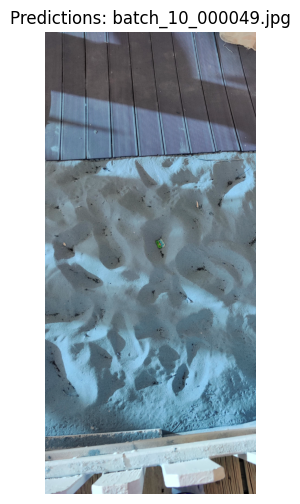


image 1/1 /content/yolo_dataset/images/train/batch_11_000083.jpg: 640x480 (no detections), 49.4ms
Speed: 3.4ms preprocess, 49.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


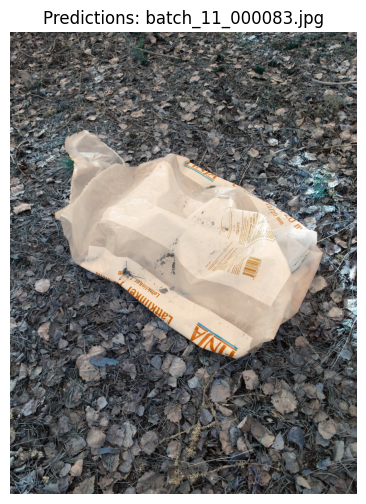


image 1/1 /content/yolo_dataset/images/train/batch_8_000009.jpg: 640x480 (no detections), 13.0ms
Speed: 5.2ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


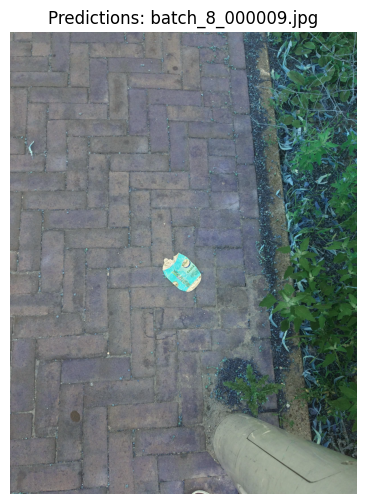


image 1/1 /content/yolo_dataset/images/train/batch_9_000098.jpg: 640x320 (no detections), 13.4ms
Speed: 5.0ms preprocess, 13.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 320)


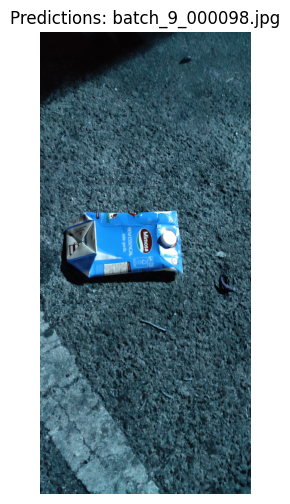


image 1/1 /content/yolo_dataset/images/train/batch_1_000056.jpg: 640x480 (no detections), 14.2ms
Speed: 4.3ms preprocess, 14.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


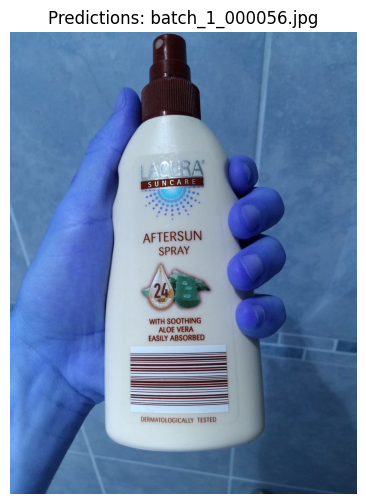


image 1/1 /content/yolo_dataset/images/train/batch_10_000068.jpg: 640x320 (no detections), 13.3ms
Speed: 3.3ms preprocess, 13.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 320)


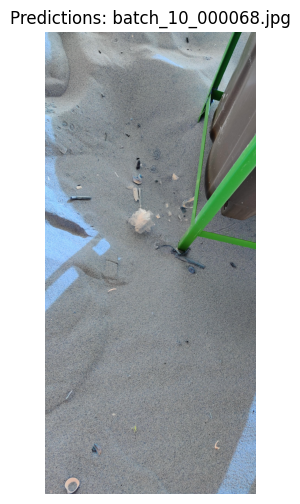


image 1/1 /content/yolo_dataset/images/train/batch_14_000072.jpg: 640x480 (no detections), 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


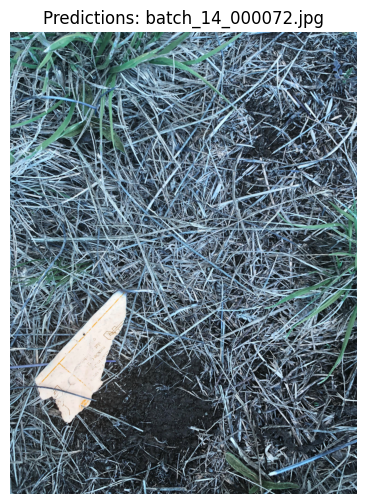


image 1/1 /content/yolo_dataset/images/train/batch_13_000030.jpg: 640x480 (no detections), 10.3ms
Speed: 4.2ms preprocess, 10.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)



image 1/1 /content/yolo_dataset/images/train/batch_10_000096.jpg: 640x480 (no detections), 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


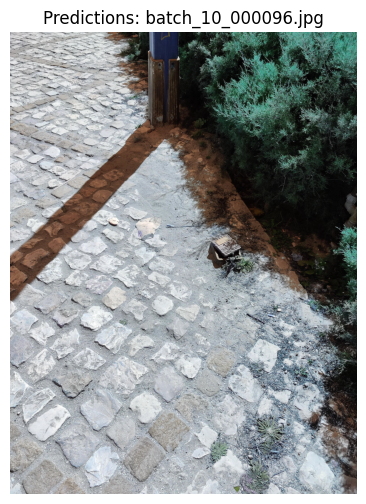

In [18]:

# Load the model and try it out
model = YOLO(best_model_path)
train_images_path = dataset_root_path / "images" / "train"
image_files = list(train_images_path.glob('*.jpg'))

sample_images = sample(image_files, 10)

for image_path in sample_images:
    result = model(image_path)[0]
    annotated_image = result.plot()

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.title(f'Predictions: {image_path.name}')
    plt.axis('off')
    plt.show()